## Problem Statement

Build the linear regression model using scikit learn in boston data to predict **'Price'** based on other dependent variable.

**1. Importing the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

**2. Loading the dataset**

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos=pd.DataFrame(boston.data)
bos.head() ##Looking at the data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos.shape

(506, 13)

**3. Exploring the dataset.**

In [4]:
##Keys in the dataset
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.DESCR) ##Description of the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Extracting feature names.

In [6]:
print(boston.feature_names) 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Reloading the bos dataframe with feature names.

In [7]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Adding the target variable "Price" to the frame. 

In [8]:
bos['Price']=boston.target

In [9]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
bos.shape

(506, 14)

**4. Data Preprocessing.**

Lets check whether there are any missing values in the data. 

In [11]:
bos.info() #Checking the complete info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
##Checking the null value explicitly
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

There is no null value, so we can proceed further :)

**5. Exploratory Data Analysis**

It is a very important step before training the model.Lets plot some graphs to understand the dataset even more.

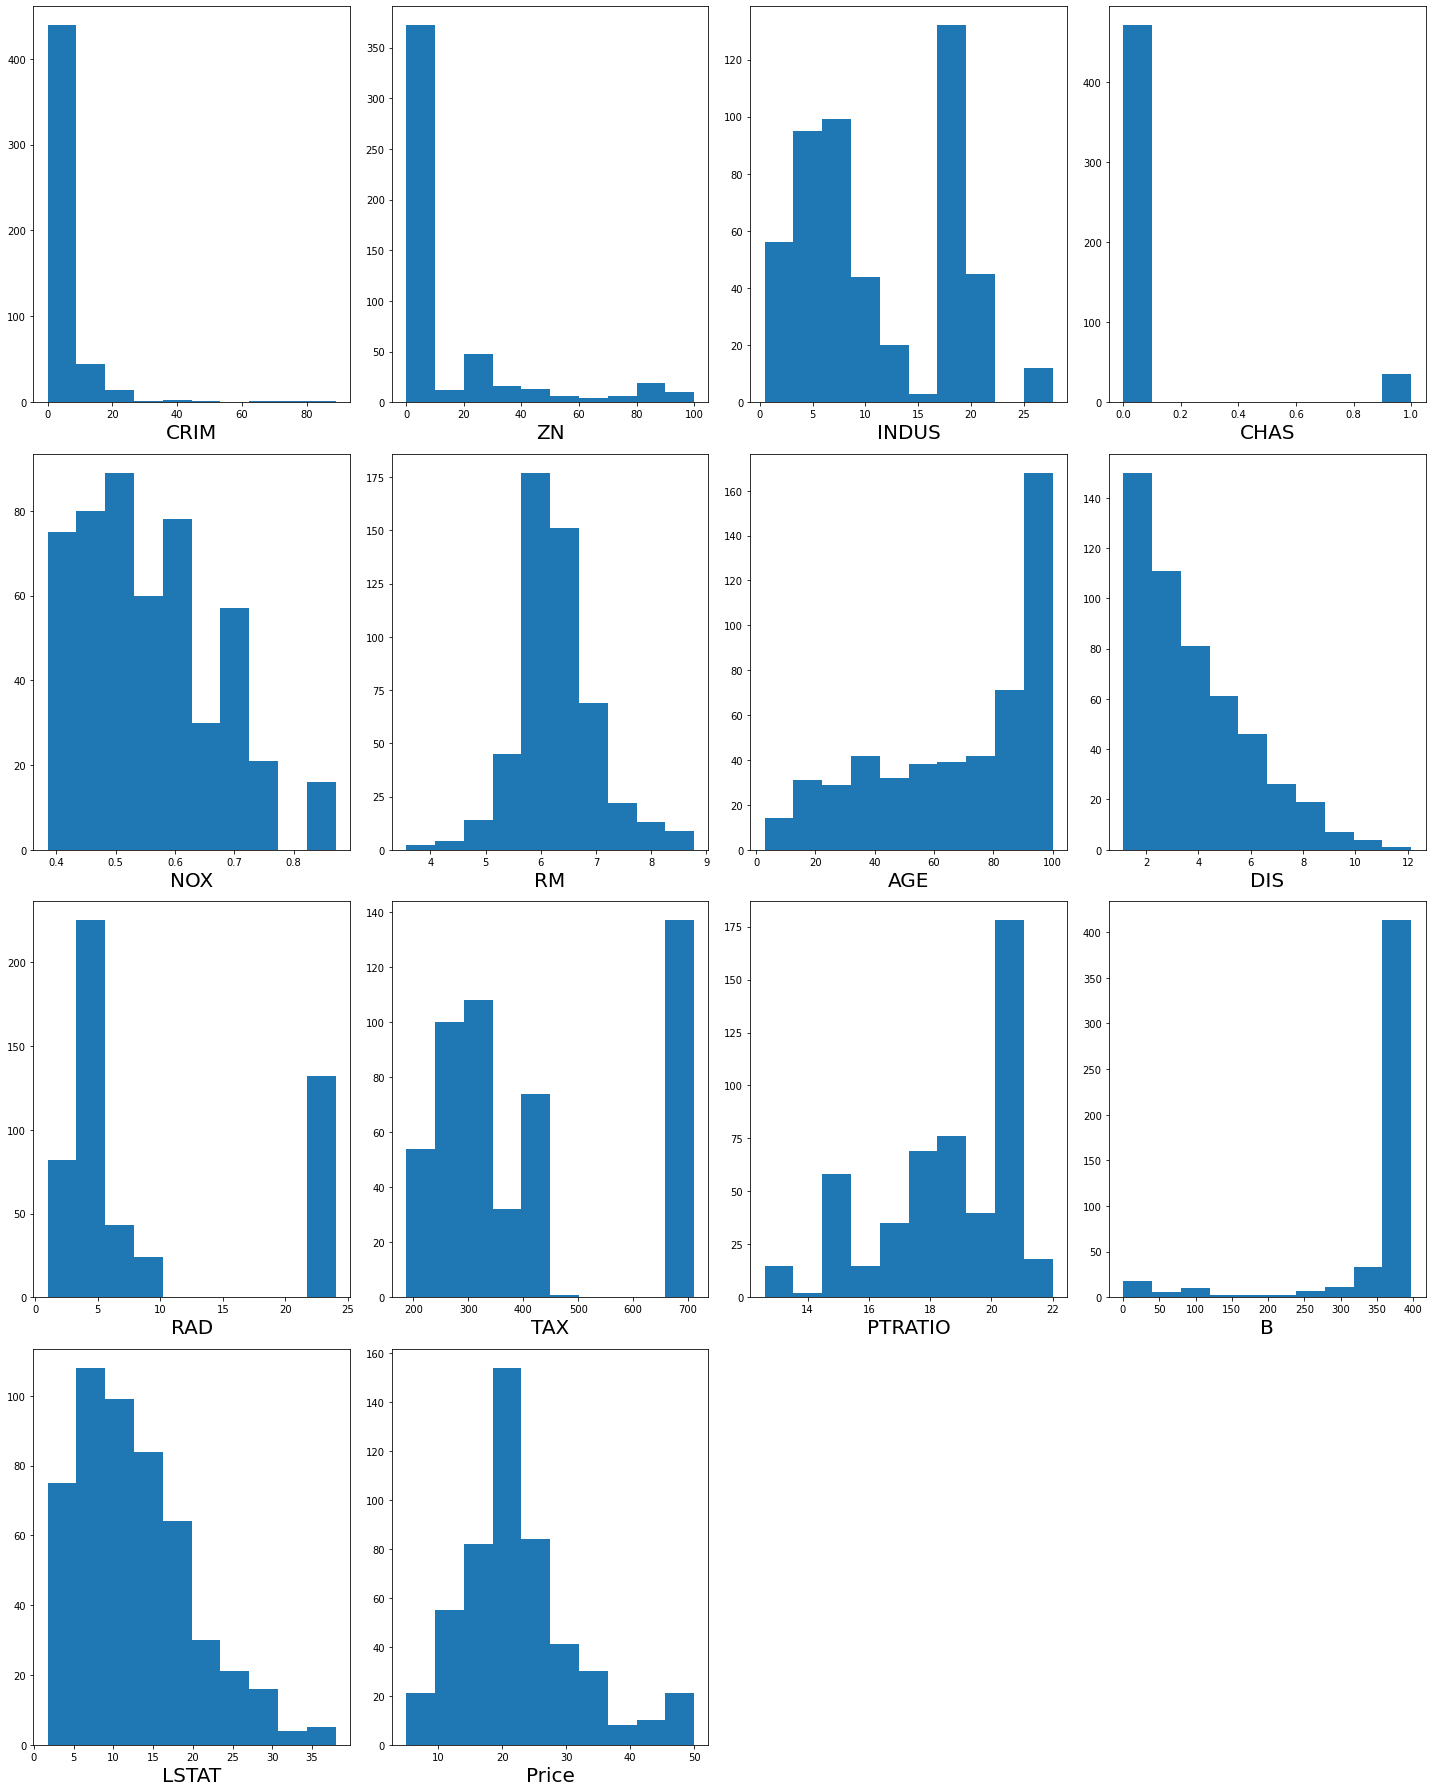

In [13]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in bos.columns: 
    ax=plt.subplot(4,4,plotnumber)
    plt.hist(bos[i])
    #sns.distplot(bos[i])
    plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here we can observe that the dataset is not standardized. Before building the model we have standardize our data.

In [14]:
X=bos.drop(['Price'],axis=1)
y=bos['Price']

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_trans=sc.fit_transform(X)

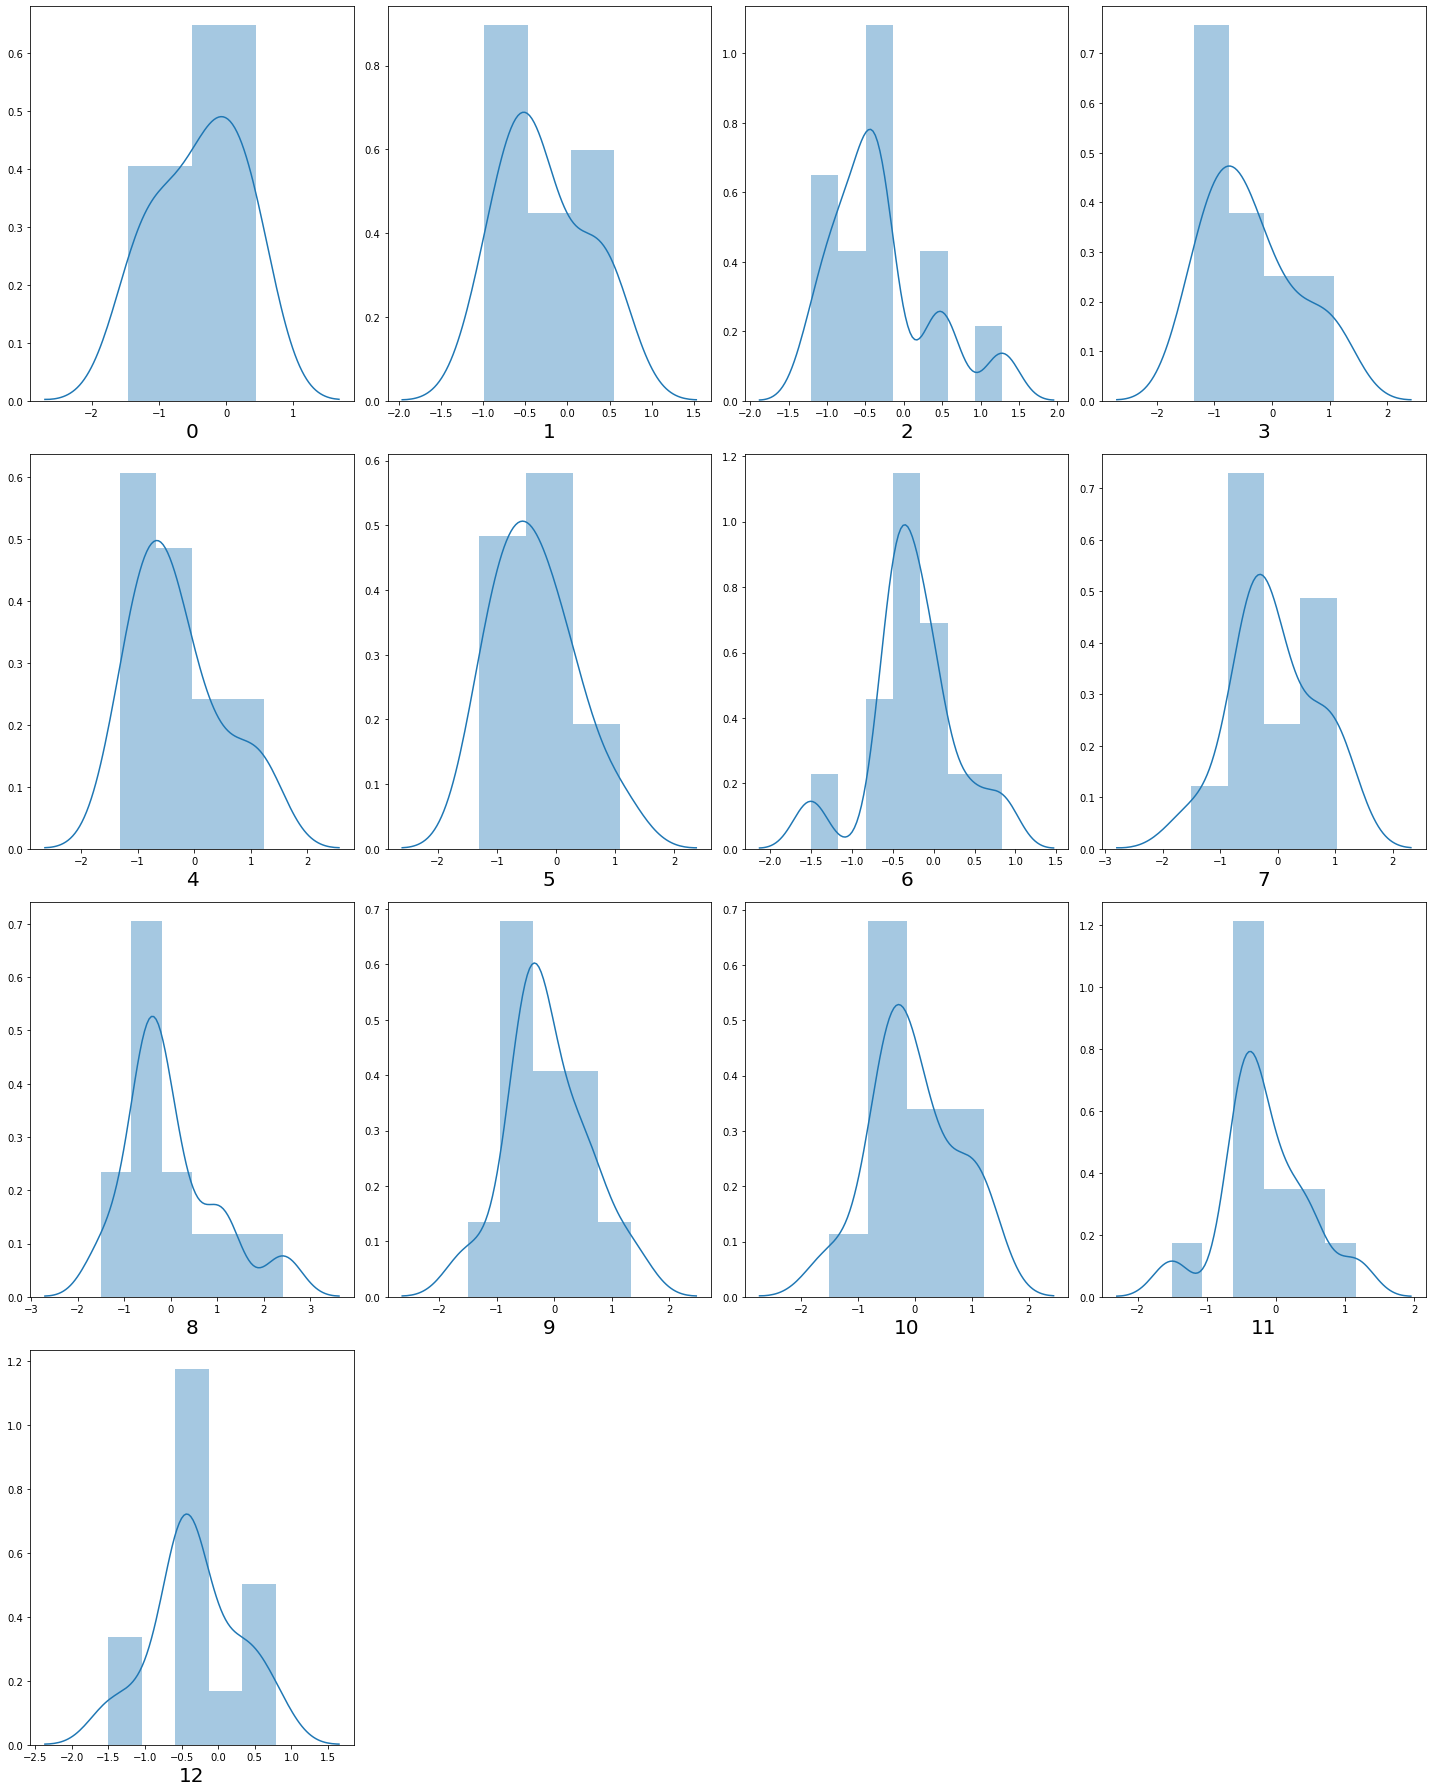

In [16]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in range(13):
    ax=plt.subplot(4,4,plotnumber)
    #plt.hist(bos[i])
    sns.distplot(X_trans[i])
    plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
X_trans.shape

(506, 13)

In [18]:
y.shape

(506,)

Let's observe the relationship between independent variables and dependent variable.

In [19]:
bos1=pd.DataFrame(X_trans)

In [20]:
bos1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [21]:
bos1['13']=y

In [22]:
bos1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


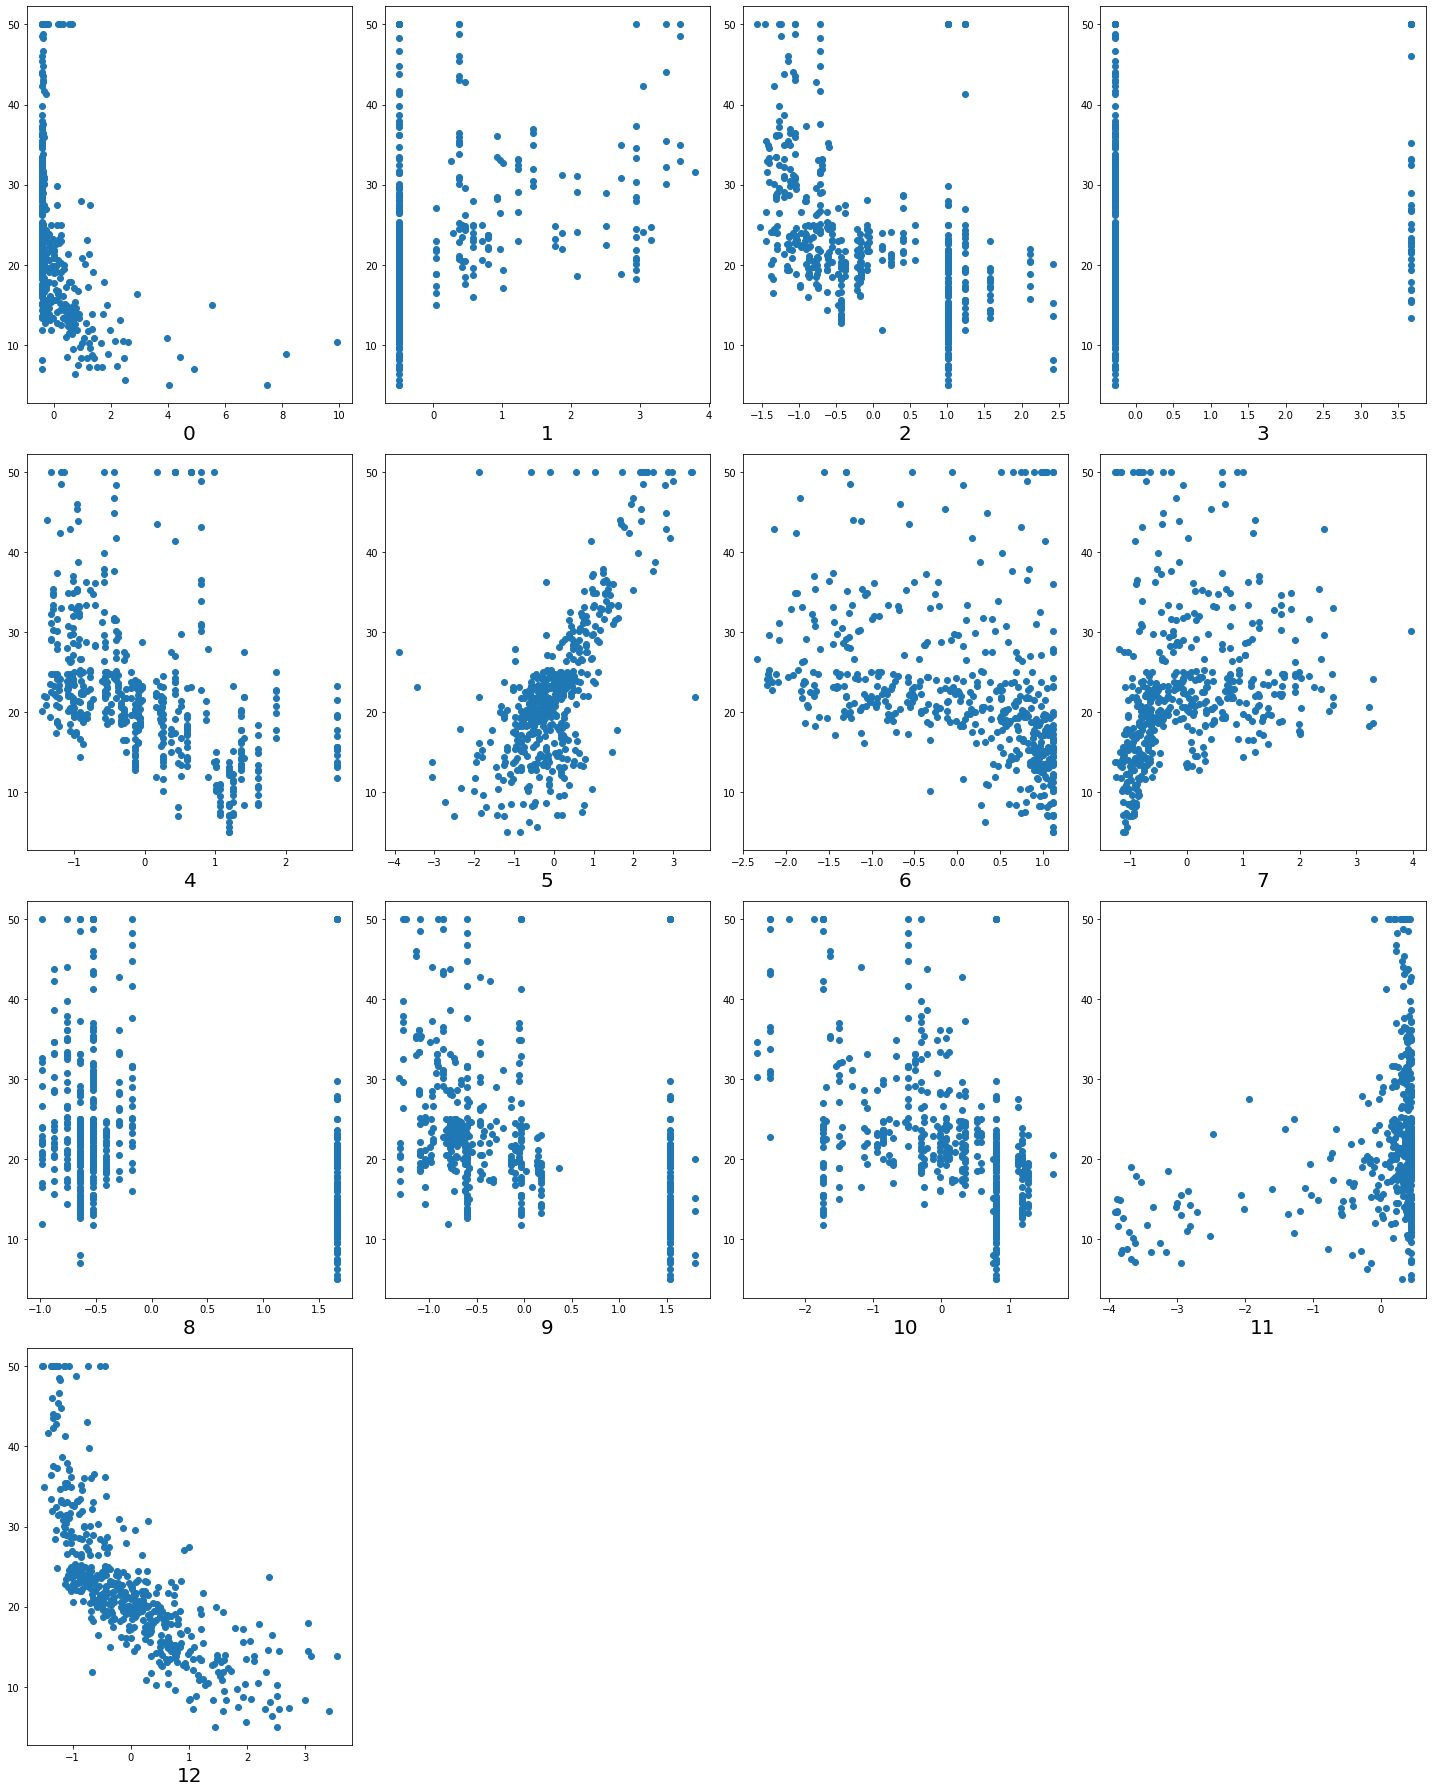

In [23]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in bos1.columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(bos1[i],bos.Price)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can observe that as the value of **RM** increases **Price** also increases(linearly).
Also, as the value of **LSTAT** increases, **Price** decreases.     
There are few outliers too and thus need to take care of it.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_trans,i) for i in range(X_trans.shape[1])]
vif['Features']=X.columns

In [26]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Here, the vif values of columns **RAD** and **TAX** >5 thus have severe cases of multicollinearity. We drop these columns to avoid such cases.

In [27]:
X=X.drop(['RAD','TAX'],axis=1)

In [28]:
X_trans=sc.fit_transform(X)

In [29]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_trans,i) for i in range(X_trans.shape[1])]
vif['Features']=X.columns

In [30]:
vif

,VIF,Features
0,1.478206,CRIM
1,2.154483,ZN
2,3.179166,INDUS
3,1.057805,CHAS
4,3.901348,NOX
5,1.872532,RM
6,3.075755,AGE
7,3.954443,DIS
8,1.496077,PTRATIO
9,1.316559,B


Now, we don't any VIF greater than 5 , so we are good to go.

**6. Splitting the data into training and testing sets.**

We split the data into training and testing sets. We train the model with 75% and test data with the remaining 25%. We do this to assess the model's performance on unseen data.

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_trans,y,test_size=0.25,random_state=355)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lin_reg_score_train=lr.score(x_train,y_train)
lin_reg_score_train

0.7221847012235341

In [34]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [35]:
adj_r2(x_train,y_train)

0.7138578121593893

In [36]:
lin_reg_score_test=lr.score(x_test,y_test)
lin_reg_score_test

0.732544832609459

In [37]:
adj_r2(x_test,y_test)

0.7069621644242768

So it looks like our model r2 score is less on the test data.   
Let's see if our model is overfitting our training data.

In [38]:
from sklearn.linear_model import LassoCV
las_cv=LassoCV(alphas=None, cv=10, max_iter=10000,normalize=True)
las_cv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [39]:
alpha=las_cv.alpha_
alpha

0.005913224207167832

In [40]:
lasso_reg_score_train=las_cv.score(x_train,y_train)
lasso_reg_score_train 

0.7190991320253284

In [41]:
lasso_reg_score_test=las_cv.score(x_test,y_test)
lasso_reg_score_test

0.7334536996636629

In [42]:
from sklearn.linear_model import RidgeCV
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([4.73974498, 5.44571405, 6.03629757, 3.11611162, 9.91414823,
       7.89038767, 7.79603136, 0.31467827, 2.3035183 , 2.27239433,
       6.62895358, 2.9675233 , 1.22415128, 8.82718476, 9.58851869,
       7.45705159, 5.73764216, 8.66352595, 7.12384341, 5.33268872,
       9.65458185, 2.56180595, 8.05869867, 0.79827701, 3.67812867,
       5.60295605, 3.592982  , 6.81096374, 6.21350974, 6.35932247,
       8.0461396 , 2.34069624, 1.63049468, 1.78949452, 8.58406812,
       7.28235837, 7.11436263, 9.27491437, 3.49462256, 9.55373541,
       1.92945248, 5.93103725, 5.59535281, 9.7576074 , 6.50483528,
       7.44510598, 8.01952076, 4.01109677, 7.3957637 , 3.30373534]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [43]:
ridgecv.alpha_

0.3146782654015068

In [44]:
ridge_reg_score_train=ridgecv.score(x_train,y_train)
ridge_reg_score_train

0.6981025563991066

In [45]:
ridge_reg_score_test=ridgecv.score(x_test,y_test)
ridge_reg_score_test

0.6961960055844252

In [46]:
ridgecv.coef_

array([-0.54212928,  0.56987401, -0.67753828,  0.90762472, -0.75737322,
        2.83866704, -0.30011211, -1.2606358 , -1.46424912,  0.68088812,
       -2.30181484])

In [47]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(alphas=None,cv=10)
elasticnetcv.fit(x_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [48]:
elasticnetcv.coef_

array([-0.41256588,  0.80925067, -0.55935083,  1.00133046, -1.28691258,
        3.24479836, -0.34589213, -2.39418327, -1.61491085,  0.6768723 ,
       -2.82510704])

In [49]:
elasticnetcv.alpha_

0.08122804400292316

In [50]:
elasticnet_score_train=elasticnetcv.score(x_train,y_train)
elasticnet_score_train

0.7197325406669517

In [51]:
elasticnet_score_test=elasticnetcv.score(x_test,y_test)
elasticnet_score_test

0.7295309009805895

Training and Testing scores of the model using various regularisation techniques.

In [52]:
print("Training score(without regularization)        : ", lin_reg_score_train*100)
print("Test score(without regularization)            : ", lin_reg_score_test*100)
print("Training score(with lasso regularization)     : ", lasso_reg_score_train*100)
print("Test score(with lasso regularization)         : ", lasso_reg_score_test*100)
print("Training score(with ridge regularization)     : ", ridge_reg_score_train*100)
print("Test score(with ridge regularization)         : ", ridge_reg_score_test*100)
print("Training score(with elasticnet regularization): ", elasticnet_score_train*100)
print("Test score(with elasticnet regularization)    : ", elasticnet_score_test*100)

Training score(without regularization)        :  72.21847012235341
Test score(without regularization)            :  73.2544832609459
Training score(with lasso regularization)     :  71.90991320253283
Test score(with lasso regularization)         :  73.34536996636629
Training score(with ridge regularization)     :  69.81025563991065
Test score(with ridge regularization)         :  69.61960055844251
Training score(with elasticnet regularization):  71.97325406669518
Test score(with elasticnet regularization)    :  72.95309009805895


Even after using different types of regularisation techniques we are getting the same r2 score approximately, Hence we can conclude that our model is not overfitted.

In [53]:
#Saving the model to the local file system

In [54]:
import pickle
filename='finalized_linear_model.pickle'
pickle.dump(lr,open(filename,'wb'))